<a href="https://colab.research.google.com/github/valerian720/test_of_pic_filters_to_negitiate_scratches/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. сгенерировать изображения из вертикальных полосок на основе функцции синуса (1d решетка)
2. размыть при помощи фильтра (выбрать 3 размера)
3. добавить импульсный шум (ака поцарапать/линии) (например линия из угла в угол изображения черного или белого цвета)
4. произвести медианную фильтрацию
5. применить фильтр повышения резкости

In [ ]:
from skimage import color, data, io
from matplotlib import pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float, img_as_ubyte
from skimage import exposure, util

from skimage.filters import gaussian, laplace

import math

In [ ]:
from scipy import ndimage as ndi, misc

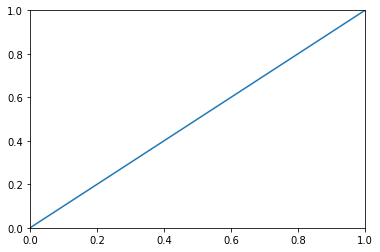

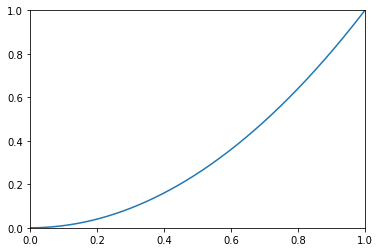

In [ ]:
def dummy_func_f(val):
  return val
def dummy_func_pow2(val):
  return val*val

def setup_plt_hyperparam(max_val=255):
  axes = plt.gca()
  axes.set_xlim([0,max_val])
  axes.set_ylim([0,max_val])


def print_plot(shader_func):
  # работа в функции идет со значениями от 0 до 1
  # bruh
  max_len = 1000

  tmp_range = [(1/max_len) * i for i in range(0, max_len)] # создание массива значений от 0 до 1 с шагом 1/max_len
  tmp = [0]*max_len # обявление выходного массива нужной длины

  for i in range(len(tmp_range)): # применение "шейдера"
    tmp[i] = shader_func(tmp_range[i])

  setup_plt_hyperparam(1)
  plt.plot(tmp_range, tmp) # 0 1 (более точно отображает применяемую функцию)
  plt.show()


print_plot(dummy_func_f)
print_plot(dummy_func_pow2)

In [ ]:

def print_pic(pic, force_minmax = False):
  if (force_minmax):
    io.imshow(pic, vmin=0, vmax=255)
  else:
    io.imshow(pic)
  plt.show()

from google.colab import files
def dowload_pic(pic, file_name):
  io.imshow(pic)
  plt.savefig(file_name+".png")
  files.download(file_name+".png")

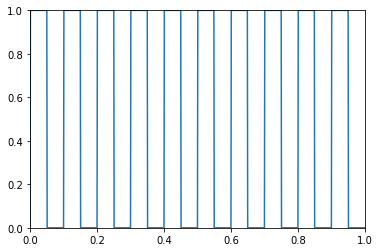

In [ ]:
square_count = 10
square_coef = math.pi*2

def square_signal(val):
  ret = 0
  if math.sin(val*square_coef*square_count) > 0:
    ret = 1
  return ret
print_plot(square_signal)

In [ ]:
def apply_square_signal_over_array(arr):
  for i in range(len(arr)):
    arr[i] = square_signal(arr[i])

In [ ]:
# изображение периодического прямоугольного сигнала
def make_pic_square_signal(pic_width, pic_higth):
  array = np.linspace(0,1,pic_width*pic_higth)
  mat = np.reshape(array,(pic_width,pic_higth))
  ret_img = mat.T
  print_pic(ret_img)

  np.apply_along_axis(apply_square_signal_over_array, 0, ret_img)
  return ret_img



In [ ]:
# Добавление в изображения импульсного шума
# square_signal_pic_soften_scratched
def add_scratch(pic, scratch_val):
  for i in range(len(pic)):
    for j in range(len(pic[0])):
      if (i==j or i==j+1 or i==j-1 or i==len(pic)//2):
        pic[i][j] = scratch_val
  return pic



In [ ]:
def test_masks(mask_size):

  # 
  square_signal_pic = img_as_ubyte(make_pic_square_signal(100, 69))
  print_pic(square_signal_pic)
  dowload_pic(square_signal_pic, "pic_1_"+str(mask_size))
  print(square_signal_pic)

  # Применение к изображению линейных сглаживающих фильтров
  # square_signal_pic_soften
  square_signal_pic_soften = gaussian(util.img_as_float(square_signal_pic.copy()) , sigma=mask_size)
  print_pic(square_signal_pic_soften)
  dowload_pic(square_signal_pic_soften, "pic_2_"+str(mask_size))

  square_signal_pic_soften_scratched = add_scratch(square_signal_pic_soften.copy(), 1)
  print_pic(square_signal_pic_soften_scratched)
  dowload_pic(square_signal_pic_soften_scratched, "pic_3_"+str(mask_size))

  # Применение к изображению медианного фильтра
  # square_signal_pic_soften_scratched_median
  square_signal_pic_soften_scratched_median = ndi.median_filter(square_signal_pic_soften_scratched.copy(), size=mask_size*2+1)
  print_pic(square_signal_pic_soften_scratched_median)
  dowload_pic(square_signal_pic_soften_scratched_median, "pic_4_"+str(mask_size))
  # Применение к изображениям, полученным в п.3 фильтра повышения резкости
  # square_signal_pic_soften_harden
  lapl = laplace(square_signal_pic_soften.copy(), ksize=mask_size*2+1)/255
  square_signal_pic_soften_harden = (square_signal_pic_soften - lapl)
  print_pic(lapl)
  print_pic(square_signal_pic_soften_harden)
  dowload_pic(square_signal_pic_soften_harden, "pic_5_"+str(mask_size))


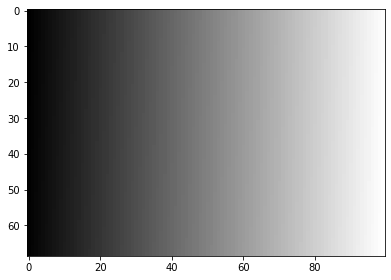

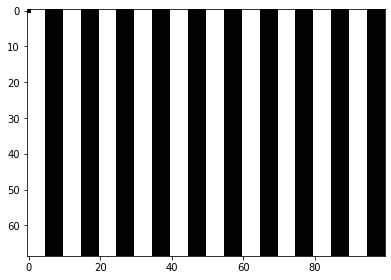

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

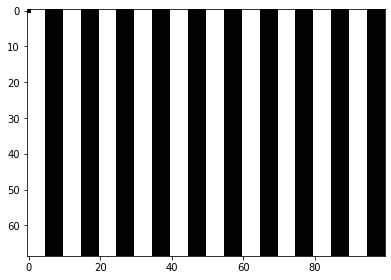

[[  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


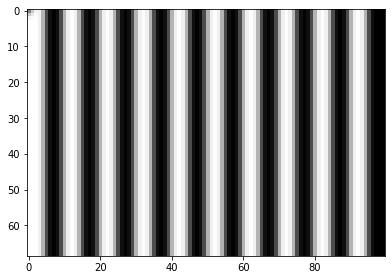

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

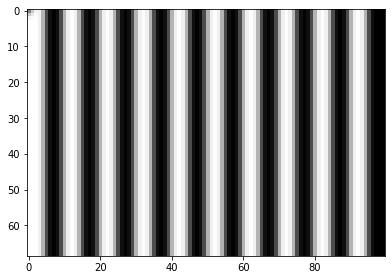

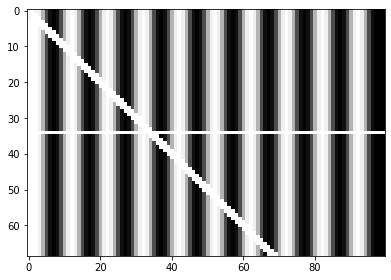

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

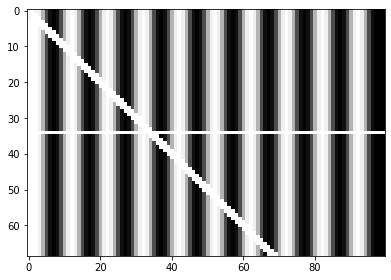

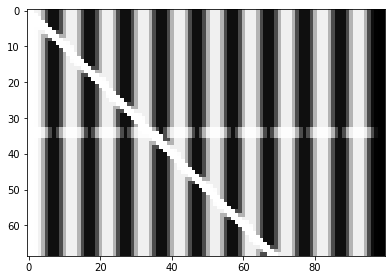

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

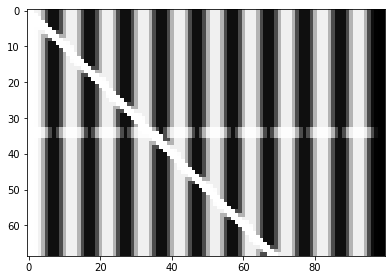

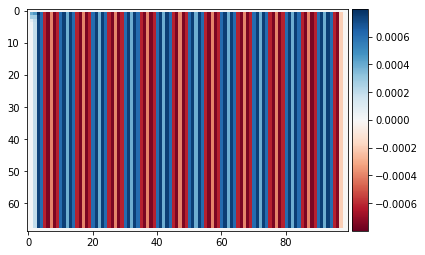

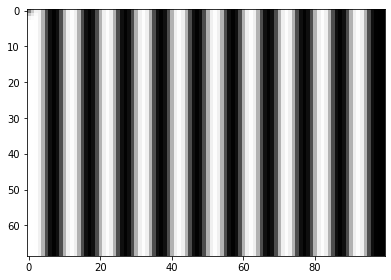

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

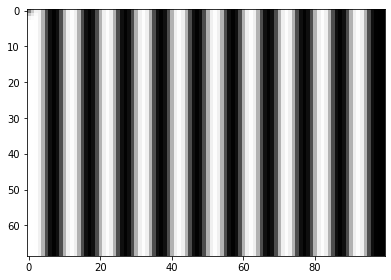

In [ ]:
test_masks(1)


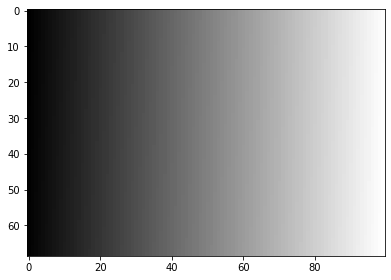

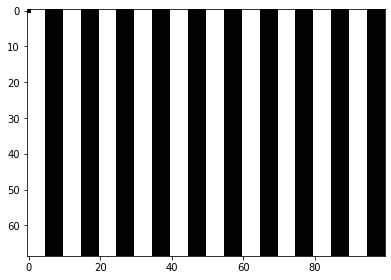

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

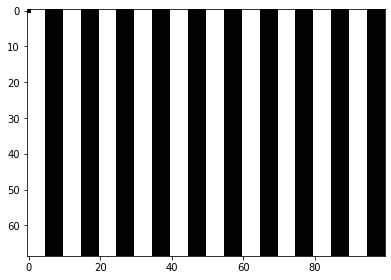

[[  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


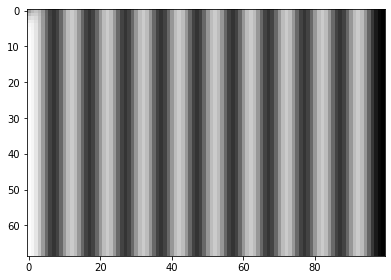

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

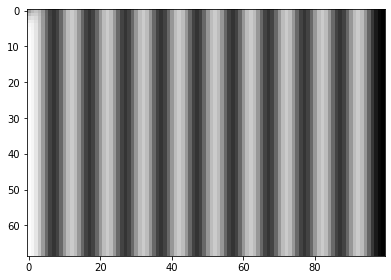

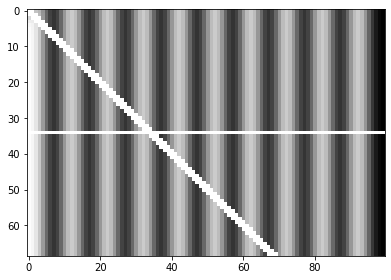

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

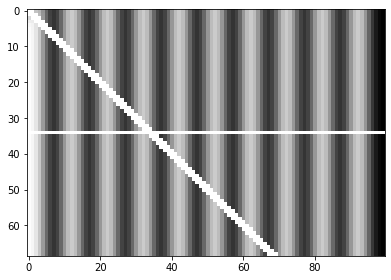

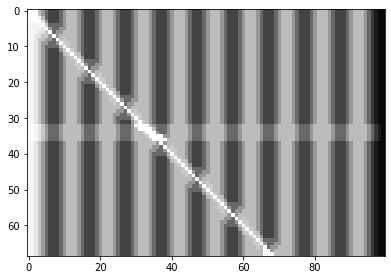

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

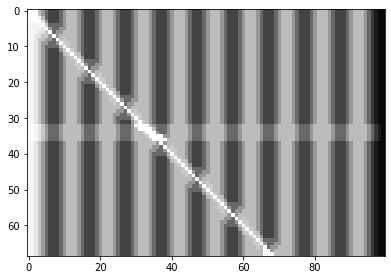

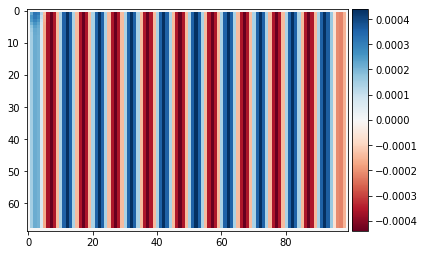

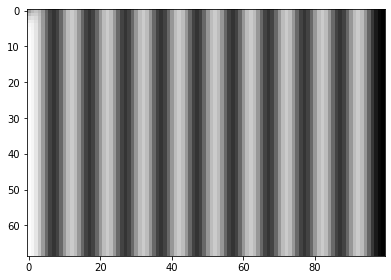

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

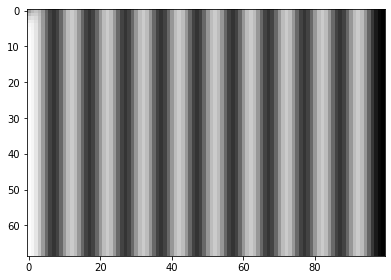

In [ ]:
test_masks(2)


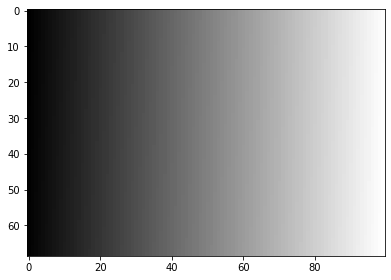

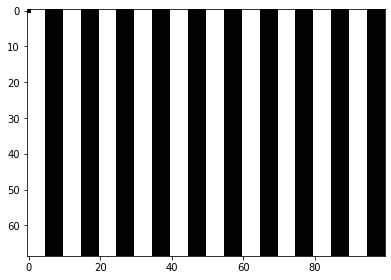

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

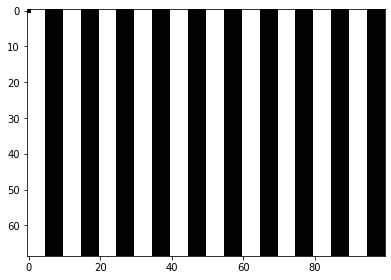

[[  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


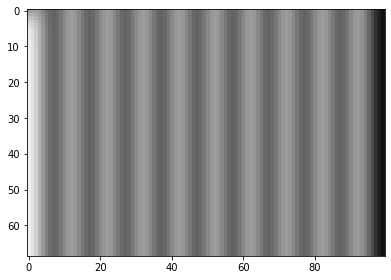

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

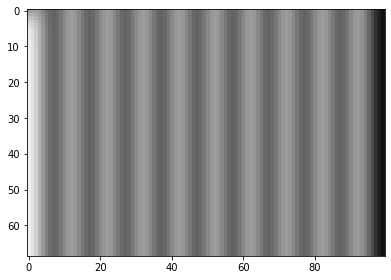

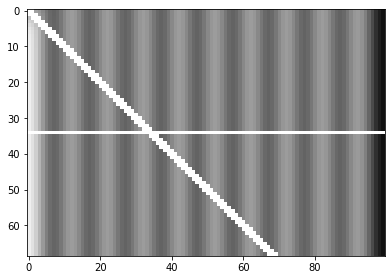

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

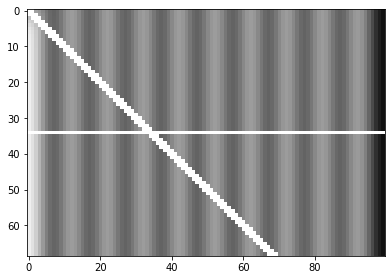

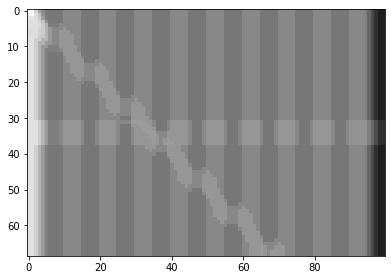

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

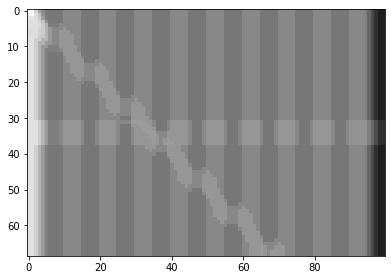

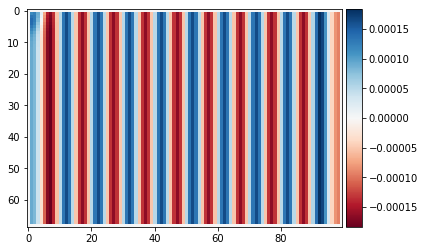

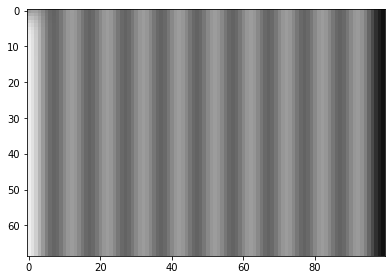

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

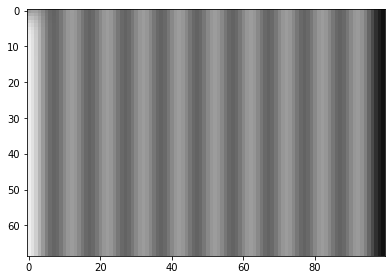

In [ ]:
test_masks(3)